# Minimum Spanning Tree
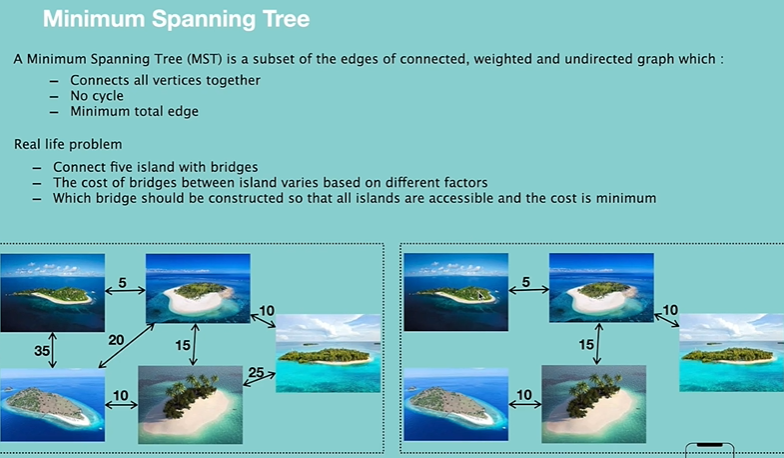

# Difference Between Minimum Spanning Tree and Single Source shortest path problem
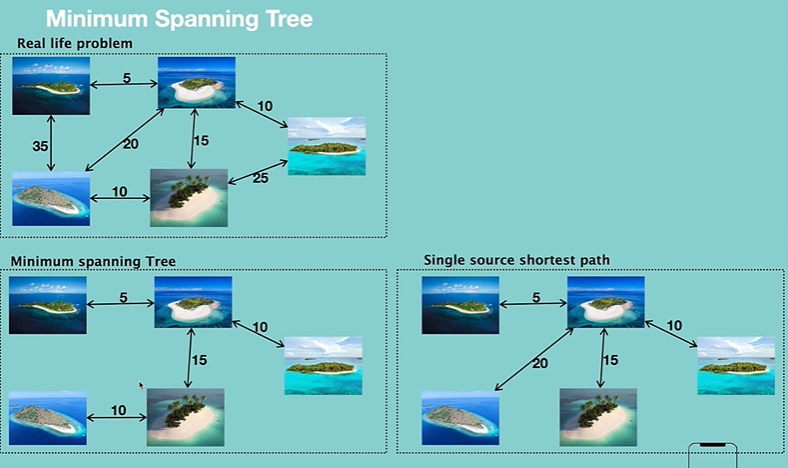

# Disjoint Set
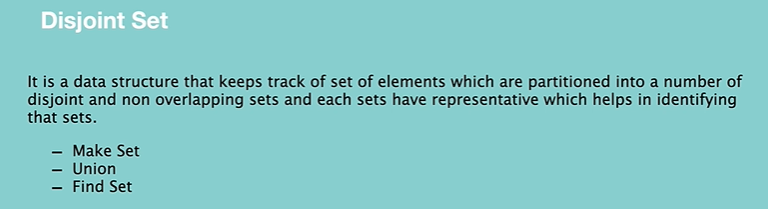

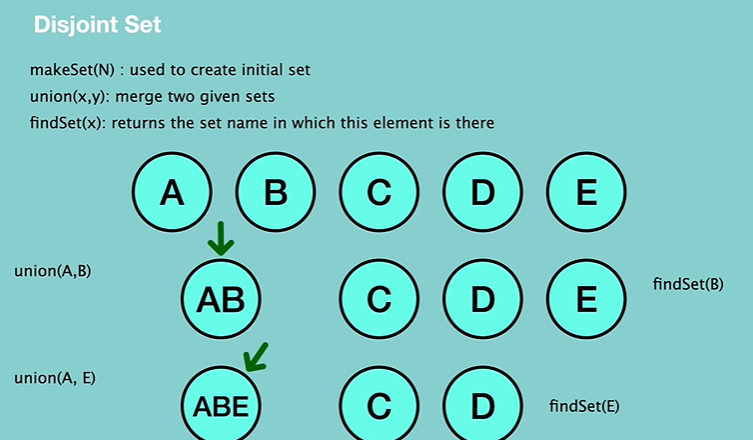

In [1]:
class DisjointSet:
    def __init__(self, vertices):
        self.vertices = vertices
        self.parent = {}
        for v in vertices:
            self.parent[v] = v
        self.rank = dict.fromkeys(vertices, 0)
    
    def find(self, item):
        if self.parent[item] == item:
            return item
        else:
            return self.find(self.parent[item])
    
    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1


In [2]:
vertices = ["A", "B", "C", "D", "E"]


In [7]:
ds = DisjointSet(vertices)
print(ds.find("A"))

A


In [9]:
ds.union("A", "B")
print(ds.find("B"))

A


In [10]:
ds.union("A", "C")
print(ds.find("C"))

A


# Kruskal's Algorithm (To find Minimum Spanning Tree)
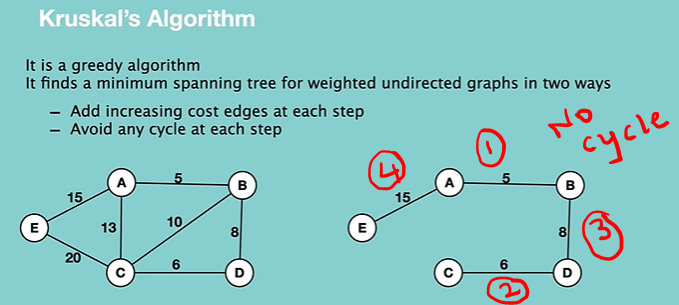

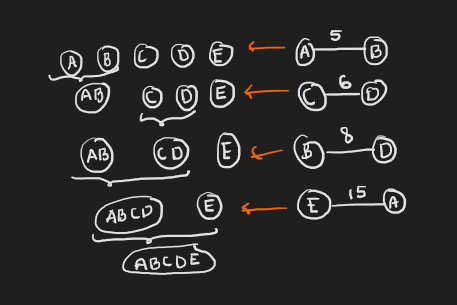

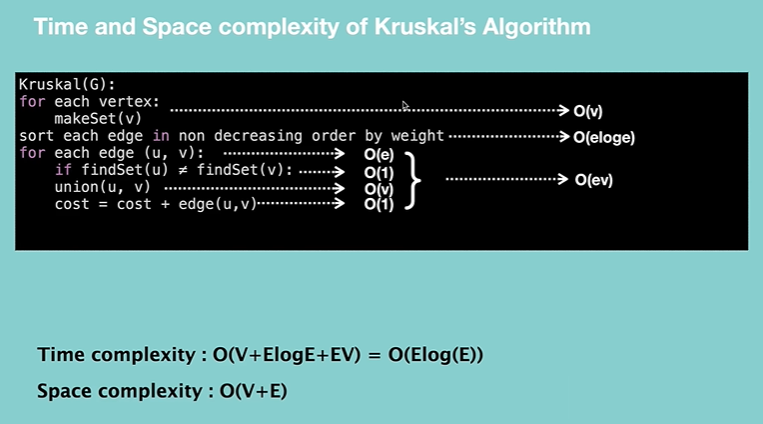

In [11]:


class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []
        self.nodes = []
        self.MST = []

    def addEdge(self, s, d, w):
        self.graph.append([s, d, w])
    
    def addNode(self, value):
        self.nodes.append(value)
    
    def printSolution(self,s,d,w):
        for s, d, w in self.MST:
            print("%s - %s: %s" % (s, d, w))
    
    def kruskalAlgo(self):
        i, e = 0, 0
        ds = DisjointSet(self.nodes)
        self.graph = sorted(self.graph, key=lambda item: item[2])
        while e < self.V - 1:
            s, d, w = self.graph[i]
            i += 1
            x = ds.find(s)
            y = ds.find(d)
            if x != y:
                e += 1
                self.MST.append([s,d,w])
                ds.union(x,y)
        self.printSolution(s,d,w)


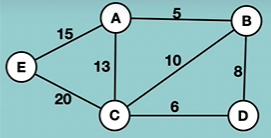

In [12]:

g = Graph(5)
g.addNode("A")
g.addNode("B")
g.addNode("C")
g.addNode("D")
g.addNode("E")
g.addEdge("A", "B", 5)
g.addEdge("A", "C", 13)
g.addEdge("A", "E", 15)
g.addEdge("B", "A", 5)
g.addEdge("B", "C", 10)
g.addEdge("B", "D", 8)
g.addEdge("C", "A", 13)
g.addEdge("C", "B", 10)
g.addEdge("C", "E", 20)
g.addEdge("C", "D", 6)
g.addEdge("D", "B", 8)
g.addEdge("D", "C", 6)
g.addEdge("E", "A", 15)
g.addEdge("E", "C", 20)

g.kruskalAlgo()




A - B: 5
C - D: 6
B - D: 8
A - E: 15


# Prims Algorithm (To find Minimum Spanning Tree)
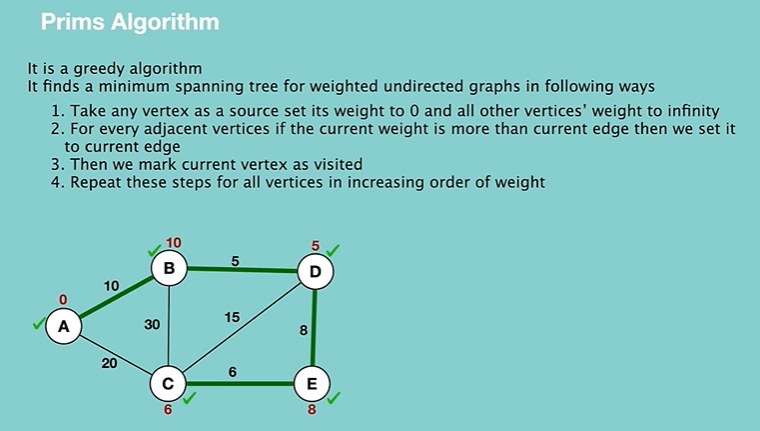
### Time Complexity :: $O(V^3)$
### Space Complexity :: $O(V)$

In [13]:
import sys
class Graph:
    def __init__(self, vertexNum, edges, nodes):
        self.edges = edges
        self.nodes = nodes
        self.vertexNum = vertexNum
        self.MST = []
    
    def printSolution(self):
        print("Edge : Weight")
        for s, d, w in self.MST:
            print("%s -> %s: %s" % (s, d, w))
    
    def primsAlgo(self):
        visited = [0]*self.vertexNum
        edgeNum=0
        visited[0]=True
        while edgeNum<self.vertexNum-1:
            min = sys.maxsize
            for i in range(self.vertexNum):
                if visited[i]:
                    for j in range(self.vertexNum):
                        if ((not visited[j]) and self.edges[i][j]):
                            if min > self.edges[i][j]:
                                min = self.edges[i][j]
                                s = i
                                d = j
            self.MST.append([self.nodes[s], self.nodes[d], self.edges[s][d]])
            visited[d] = True
            edgeNum += 1
        self.printSolution()


In [14]:
edges = [[0, 10, 20, 0, 0],
        [10, 0, 30, 5, 0],
        [20, 30, 0, 15, 6],
        [0, 5, 15, 0, 8],
        [0, 0, 6, 8, 0]]
nodes = ["A","B","C","D","E"]
g = Graph(5, edges, nodes)
g.primsAlgo()


Edge : Weight
A -> B: 10
B -> D: 5
D -> E: 8
E -> C: 6


# Prims vs Kruskal Algorithms for Minimum Spanning Tree
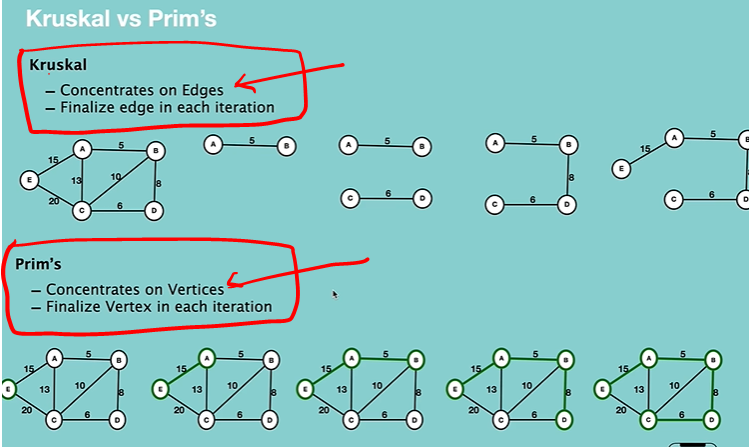

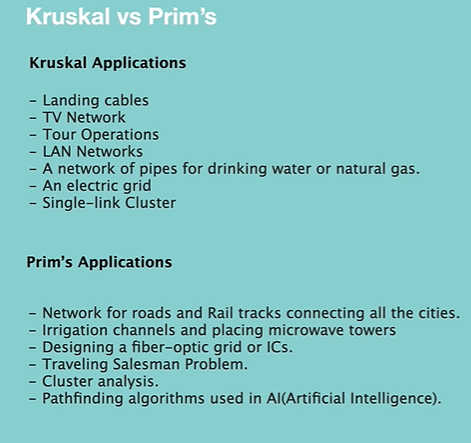